In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# supress warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#### Step 1 - Data Preparation and Understanding

In [359]:
df = pd.read_csv('employee_data.csv')
df.shape


(1470, 35)

In [360]:
df.head(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [361]:
df.tail(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [362]:
# Dependent Variable is " Attrition "
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [363]:
df.isnull().sum()
# Dataset does not contain any null values


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

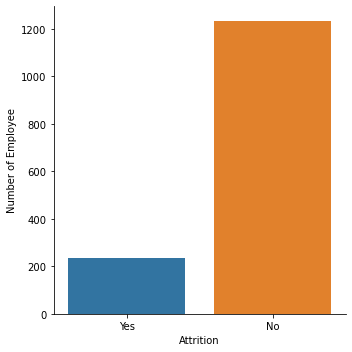

In [364]:
# Checking number of Attrition of employee
ax = sns.catplot(x='Attrition', data=df, kind='count')
ax.set(ylabel='Number of Employee', xlabel='Attrition')
# Dropping EmployeeNumber columns which is of no use
df.drop('EmployeeNumber',inplace=True,axis=1)

In [365]:
# Checking bias of dataset
cnt = df.Attrition.value_counts()
attr_yes_prc = round(cnt[1]/df.shape[0], 2) * 100
attr_no_prc = round(cnt[0]/df.shape[0], 2) * 100
print('attrition_yes = ', attr_yes_prc, '%')
print('attrition_no = ', attr_no_prc, '%')


attrition_yes =  16.0 %
attrition_no =  84.0 %


In [366]:
# Extract numeric and categorical data 
df_num = pd.DataFrame(data=df.select_dtypes(include=['int64']))
df_cat = pd.DataFrame(data = df.select_dtypes(include = ['object']))
df_num.shape,df_cat.shape
# 26 columns are numerice 
# 9 columns are categorical

((1470, 25), (1470, 9))

In [367]:
df_num.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0


In [368]:
df_cat.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes


##### Encoding Categorical Data

In [369]:


# Encode binary categorical data
bin_cat_col = ['Attrition', 'Gender', 'Over18', 'OverTime']
df[bin_cat_col] = df[bin_cat_col].apply(lambda x: x.map({
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0,
    'Y': 1,
    'N': 0
}))
df.head(4)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0


In [370]:
# Creating dummy variables for remaining categorical data
rem_cat_col = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus' ]

# BusinessTravel
dummy_travel = pd.get_dummies(df.BusinessTravel, prefix='BusinessTravel')
dummy_travel.drop('BusinessTravel_Non-Travel', inplace=True, axis=1)

# Department
dummy_department = pd.get_dummies(
    df.Department, prefix='Department', drop_first=True)

# EducationField
dummy_education = pd.get_dummies(df.EducationField, prefix='EducationField')
dummy_education.drop('EducationField_Human Resources', inplace=True, axis=1)

# JobRole
dummy_jobrole = pd.get_dummies(df.JobRole, prefix='JobRole')
dummy_jobrole.drop('JobRole_Human Resources', inplace=True, axis=1)

# MaritalStatus
dummy_mstatus = pd.get_dummies(df.MaritalStatus, prefix='MaritalStatus')
dummy_mstatus.drop('MaritalStatus_Single', inplace=True, axis=1)

# Merge the dummy dataframes with the main DataFrame
df = pd.concat([df, dummy_travel, dummy_department,
                dummy_education, dummy_jobrole, dummy_mstatus],axis=1)
df.drop(columns=rem_cat_col,inplace=True)


In [371]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,0,1,0,0,0
1,49,0,279,8,1,1,3,1,61,2,...,0,0,0,0,0,1,0,0,0,1
2,37,1,1373,2,2,1,4,1,92,2,...,0,1,0,0,0,0,0,0,0,0
3,33,0,1392,3,4,1,4,0,56,3,...,0,0,0,0,0,1,0,0,0,1
4,27,0,591,2,1,1,1,1,40,3,...,0,1,0,0,0,0,0,0,0,1


### PENDING--Contribution is Appreciated
##### NOTE : At this point we have to perform univariate and multivairate analysis to visualize the hidden pattern and understand the data 

#### Step 2 - Splitting the data into Train and Test set

In [372]:
import sklearn 
from sklearn.model_selection import train_test_split 

In [373]:
df_train, df_test = train_test_split(
    df, train_size=0.8, test_size=0.2, random_state=100)


#### Step 3 - Scaling numeric data using StandardScaler

In [374]:
from sklearn.preprocessing import StandardScaler

In [375]:
scaler = StandardScaler()
# fitting and transforming on train set
df_train[df_num.columns] = scaler.fit_transform(df_train[df_num.columns])
# transforming on test set
df_test[df_num.columns] = scaler.transform(df_test[df_num.columns])

df_train.shape,df_test.shape

((1176, 48), (294, 48))

In [376]:
# Creating X_train and y_train
y_train = df_train.pop('Attrition')
X_train = df_train
X_train.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
1361,-1.204094,0.718058,-0.394740,0.090523,0.0,0.249337,1,-0.250136,1.761869,-0.950626,...,0,1,0,0,0,0,0,0,0,1
610,-1.093113,-1.345761,-0.517484,-1.862783,0.0,0.249337,1,-1.184917,-1.019283,0.856870,...,0,0,0,0,1,0,0,0,1,0
542,0.127686,-1.597812,-1.008456,0.090523,0.0,0.249337,0,0.733843,0.371293,0.856870,...,0,0,0,1,0,0,0,0,0,0


In [377]:
y_train.head(3)

1361    0
610     0
542     0
Name: Attrition, dtype: int64

In [378]:
# Creating X_test an y_test 
y_test = df_test.pop('Attrition')
X_test = df_test
X_test.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
880,-0.538204,-1.727580,0.464462,0.090523,0.0,0.249337,0,0.537047,-1.019283,-0.950626,...,0,1,0,0,0,0,0,0,0,1
152,1.792410,1.566545,-0.394740,-0.886130,0.0,-0.664123,1,-1.578508,0.371293,-0.046878,...,0,0,0,0,0,0,0,1,0,1
1466,0.238667,-0.487292,-0.394740,-1.862783,0.0,1.162797,1,-1.184917,-1.019283,0.856870,...,1,0,0,0,0,0,0,0,0,1


In [379]:
y_test.head(3)

880     0
152     0
1466    0
Name: Attrition, dtype: int64

#### Step 4 - Model Fitting

### AdaBoost Classifier

The most important parameters are base_estimator , n_estimators and learning_rate

1. base_estimator - Its and learning algorithm used to train the weak models. The default learning algorithm is DecisionTreeClassifier with max_depth of 1
2. n_estimators - Its the number of models to iteratively train 
3. learning_rate - It is the contribution of each model to the weight and default value is 1 . Thier is a trade-off between learning_rate and n_estimators. Reducing the learning_rate will force the model to train slower (but sometime resulting in better performance). Decreasing the learning rate L makes the coefficients smaller , which reduces the amplitude of sample_weight at each steps.

In [380]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [381]:
# Instantiating AdaBoostCalssifier object
# we do not have many hyperparameter so tuning with cross validation may not provide  significant change
adaboost = AdaBoostClassifier(n_estimators=100,random_state=1)

In [382]:
# Fitting the model on training data
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [383]:
#predicion done on training and testing set 
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

In [384]:
print('METRICS FOR TRAINING SET')
print('accuracy :',accuracy_score(y_train,y_train_pred))
print('confusion matrix :')
confusion_matrix(y_train,y_train_pred)

METRICS FOR TRAINING SET
accuracy : 0.91921768707483
confusion matrix :


array([[965,  21],
       [ 74, 116]], dtype=int64)

In [385]:
print('METRICS FOR Test SET')
print('accuracy :',accuracy_score(y_test,y_test_pred))
print('confusion matrix :')
confusion_matrix(y_test,y_test_pred)

METRICS FOR Test SET
accuracy : 0.8673469387755102
confusion matrix :


array([[235,  12],
       [ 27,  20]], dtype=int64)

In [386]:
imp = pd.DataFrame({
    'x':X_train.columns,
    'imp':adaboost.feature_importances_
})
imp.sort_values(by='imp',ascending=False)

,x,imp
1,DailyRate,0.15
11,MonthlyIncome,0.12
12,MonthlyRate,0.10
24,YearsAtCompany,0.06
0,Age,0.05
2,DistanceFromHome,0.04
28,BusinessTravel_Travel_Frequently,0.03
26,YearsSinceLastPromotion,0.03
22,TrainingTimesLastYear,0.03
21,TotalWorkingYears,0.03


### Top 5 Features of Attrition:
1. DailyRate, MonthlyIncome, MonthlyRate

2. YearsAtCompany

3. Age

4. DistanceFromHome

5. Frequent Business Travels

# Accuracy of our model is :
## Training = 92%
## Testing = 88%